## Intro to Deep Learning 
Problem: Say we want to predict no of transactions made by a customer annually using bank data, features are `Bank balance, Age, Retirement status,..`

### Linear Regression 
1. `hyp = w0 + w1*bank_balance + w2*age + w3*retirement_status + ...`
2. Linear Regression sums up the individual contribution or effect of features to predict the output. 
3. It doesn't consider the interactions between the different features. These interactions are very important. 

### Deep Learning 
1. DL models have hidden layers, node of hidden layer aggregates the information from different features then use that to predict the output. 
2. It takes into account the interactions between features. 

**Note: Important to understand the importance of these interactions see the related pdf**

### Representation Learning
1. Hidden layer nodes give the representation of pattern in the data
2. As we move forward in N.N, later hidden layers represent more complex features/patterns in data.
3. Partially replace the need for feature engineering(with feature engineering we aim to find the better features which can represent the pattern in data and predict output, but in DL, hidden layers are finding these underlying patterns( sophisticated/better features) in data)

In [1]:
import tensorflow as tf 

In [2]:
tf.__version__

'2.3.0'

## Optimizing a model 
1. To represent the model performance we use `loss function` 
2. We want to have model `weights` which give minimum model `loss`
3. Optimization Step: Step down the hill 
    - At a point, try to move down in the loss curve i.e towards lowest value
    - Find the slope of curve at a given parameter
        - if Slope = +ve
            - if you increase the parameter, you will go up in the curve
            - if you go in opposite direction, you will go down the curve(objective)
        - if slope = -ve
            - if you increase the parameter, you will go down the curve(objective)
            - if you go in opposite direction, you will go up the curve 
      

## Backpropagation 
1. `Slope of weight = input-node*(slope-of-activation-fn-output-node)*(slope-of-output-node)`
2. `Slope of node = sum_over_all_weights_that_goes_out(slope-of-weight*weight/node-value)` # verify this

## Building N.N using Keras 
1. Specify the architecture
2. Compile the model: Define loss and optimizer
3. Fit the model
    - Do the forward-propagation(For multiple examples) then, Back-propagation and Weight-update. Repeat this multiple times.
    - Backpropagation: Find the gradient for all the weights in model(slope of loss w.r.t weight)
    - Weight-updation: Gradient Descent, Adam, these optimizers perform the weight updation
4. Predict

In [3]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [4]:
data = "datasets/hourly_wages.csv"

## Optimizers
1. Adam: Good default choice. It can tune learning rate itself.

## Classification 
1. Target = discrete values
2. Ouput layer of model will have no-of-nodes = no-of-classes 
3. To use keras library, we will convert target values to one-hot encoding. 
    - This is consistent with the fact that last layer of network will have a separate node for each ouput category/class. 
    - Say we have 4 classes : (1,2,3,4), then `1 --> [1,0,0,0] , 2-->[0,1,0,0]` in one-hot encoding
    - `from tensorflow.keras.utils import to_categorical`
4. Common loss function for classification
    - `categorical_crossentropy`

In [16]:
from tensorflow.keras.utils import to_categorical
# Explore this function 

In [17]:
# Explore these functions
predictors = data.drop(['shot_result'], axis=1).as_matrix() # previously I was doing this long way
target = to_categorical(data.shot_result)

AttributeError: 'str' object has no attribute 'drop'

## Use the models 
1. Save the model
2. Load the model
3. Make predictions 

In [4]:
from tensorflow.keras.models import load_model

In [19]:
# save the model
model.save('model-name.h5') # h5: hdfs5 
# load the model 
my_model = load_model('model-name.h5')
# make the predictions 
pred = my_model.predict(predictors/features)
# Check the architecture of model
my_model.summary()

NameError: name 'model' is not defined

In [5]:
titanic_path = "datasets/titanic_all_numeric.csv"
titanic = pd.read_csv(titanic_path)

In [6]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


In [7]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [8]:
titanic[888:]

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
888,0,3,29.699118,1,2,23.45,0,True,0,0,1
889,1,1,26.000000,0,0,30.00,1,False,1,0,0
890,0,3,32.000000,0,0,7.75,1,False,0,1,0


In [9]:
predictors = titanic.drop(columns=['embarked_from_cherbourg', 'embarked_from_queenstown', \
                                   'embarked_from_southampton', 'survived', 'age_was_missing'])
predictors.head()

,pclass,age,sibsp,parch,fare,male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
features = predictors.values
target = titanic.survived.values
target = to_categorical(target)
print(features.shape, target.shape)

(891, 6) (891, 2)


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, stratify=target)
print(X_train.shape, y_train.shape)

(801, 6) (801, 2)


In [14]:
# Define the architecture 
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(6,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [15]:
# Compile the model 
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [16]:
# Train the model
model.fit(X_train, y_train)

26/26 [==============================] - 0s 2ms/step - loss: 3.6610 - accuracy: 0.4931


In [17]:
predictions = model.predict(X_test)
predictions[:5]

array([[0.20063654, 0.79936343],
       [0.27035996, 0.72964   ],
       [0.4827095 , 0.5172905 ],
       [0.16870832, 0.83129174],
       [0.6643339 , 0.33566615]], dtype=float32)

In [18]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 1.0017 - accuracy: 0.4333


[1.0017224550247192, 0.4333333373069763]

In [19]:
# save the model 
model.save("models/titanic_model.h5")

In [20]:
# load the model
from tensorflow.keras.models import load_model
titanic_model = load_model("models/titanic_model.h5")

In [21]:
titanic_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 506
Trainable params: 506
Non-trainable params: 0
_________________________________________________________________


In [22]:
titanic_model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 1ms/step - loss: 1.0017 - accuracy: 0.4333


[1.0017224550247192, 0.4333333373069763]

## Optimization of models 
1. Choosing good model hyper-parameters(learning rate, optimizer, activation function, no of layers) is a tricky job.
### Effect of learning rate 
1. If LR is too small or too large, updates may not improve model meaningfully

### Effect of Activation function (REVISIT)
1. Relu: `max(x,0)`
    - **Dying Neuron Problem**: If a nodes gets a negative input i.e ouput = relu(-N)=0 for all the data points, then that node's slope = 0 and slope of weights incoming to node is also 0. 
    - These weights will not get updated. There may be scenario when a particular node always get negative input. In that case weights will never get updated and there is no contribution of that node in prediction. That's called `Dead Node/Neuron`. This is due to flat part of activation function whose slope =0. 
2. tanh or sigmoid 
    - To avoid the Dead Neuron problem, we can use these activation functions which have no part with slope =0.
    - But these functions has parts where slope is very small. Gradients at that point are very small. 
    - These small slopes get multiplied several times when we backpropagate and multiply small numbers lead to number close to 0. 
    - This problem is called `Gradient Vanishing`. Occurs when many layers have very small slopes (e.g. due to being on flat part of tanh curve).
    - In deep networks, updates to backprop were close to 0 

## Model Validation in Deep Learning
1. DL works with large datasets
2. Using `k-fold Cross-validation` is very expensive in DL for obvious reasons(large dataset, using k-fold cross validation is very expensive. 
3. We can use `Single Validation split/score`, since data is large, score from a single validation split is reliable. 
4. `model.fit(features, target, validation_split=0.1)`

## Early Stopping 
1. If model performance is not improving i.e there is no improvement in the validation score from few last epochs then it might be good idea to stop model training there. This is `Early stopping'
2. Code 
    - `from keras.callbacks import EarlyStopping`
    - `early_stopping_monitor = EarlyStopping(patience=2)`
        - Arguement patience means we will wait for 2 epochs before stopping, we score doesn't improve in last 2 epochs training will be stopped 
    - `model.fit(features, target, validation_split=0.1, nb_epoch= 20, callbacks=[early_stopping_monitor])`
3. Using Early stopping is a smart learning, because now we can keep epochs higher, this allows model to be trained until it is improving. 

## Overfitting
1. When model starts peculiar details of training data which are particular to that set only. 
2. High Training Accuracy and low validation acc
## Underfitting
1. When model fails to learn/capture the underlying predictive pattern of data.
2. low training and validation acc
## Model Capacity
1. Model's ability to learn/capture the predictive patterns in the data
2. See the documentation 
## Workflow for optimizing model's capacity
1.Start with a small network 
2.Gradually increase capacity
3.Keep increasing capacity until validation score is no longer improving
**Note: Increasing capacity means increase the hidden layers or increase the size of layers.**

# Revisit the last chapter

In [77]:
# mnist data 
mnist = pd.read_csv("datasets/mnist.csv", names=['label'] + ['feat-'+str(i) for i in range(1,785)])
mnist.head()

,label,feat-1,feat-2,feat-3,feat-4,feat-5,feat-6,feat-7,feat-8,feat-9,...,feat-775,feat-776,feat-777,feat-778,feat-779,feat-780,feat-781,feat-782,feat-783,feat-784
0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.616,0.617
1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [78]:
features = mnist.drop(columns='label').values
labels = mnist.label.values
target = to_categorical(labels)
print(features.shape, target.shape)

(2001, 784) (2001, 10)


In [153]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.05, stratify=labels)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1900, 784) (1900, 10)
(101, 784) (101, 10)


In [204]:
# Define the model 
model = Sequential()
model.add(Dense(784, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(Dense(512, activation = 'relu'))
# model.add(tf.keras.layers.Dropout(0.20))
# model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [205]:
# Compile the model 
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [206]:
# Early stopping 
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=5)

In [207]:
# fit the model: validation_split, early stopping, epochs 
# fit method returns a history object, which records the different losses per epoch 
# History can also be find by model object : model.history.history
model_history = model.fit(X_train, y_train, validation_split=0.3, epochs=50, \
                          callbacks=[early_stopping_monitor]) #verbose=False)

Epoch 1/50
42/42 [==============================] - 1s 19ms/step - loss: 28.3525 - accuracy: 0.6564 - val_loss: 8.0237 - val_accuracy: 0.8088
Epoch 2/50
42/42 [==============================] - 1s 13ms/step - loss: 4.2786 - accuracy: 0.8669 - val_loss: 6.2847 - val_accuracy: 0.8456
Epoch 3/50
42/42 [==============================] - 1s 13ms/step - loss: 3.1017 - accuracy: 0.8970 - val_loss: 4.9186 - val_accuracy: 0.8491
Epoch 4/50
42/42 [==============================] - 1s 13ms/step - loss: 1.4303 - accuracy: 0.9286 - val_loss: 4.2374 - val_accuracy: 0.8579
Epoch 5/50
42/42 [==============================] - 1s 13ms/step - loss: 1.6511 - accuracy: 0.9316 - val_loss: 4.1403 - val_accuracy: 0.8772
Epoch 6/50
42/42 [==============================] - 1s 13ms/step - loss: 0.7705 - accuracy: 0.9436 - val_loss: 3.8549 - val_accuracy: 0.8596
Epoch 7/50
42/42 [==============================] - 1s 14ms/step - loss: 0.9148 - accuracy: 0.9526 - val_loss: 3.5905 - val_accuracy: 0.8912
Epoch 8/50
4

In [208]:
# No ouput from above fit method because verbose = False 

In [209]:
# Plot the validation score and accuracy score 
import matplotlib.pyplot as plt 

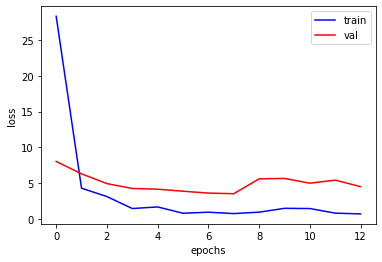

In [210]:
plt.plot(model_history.history['loss'], 'b',label='train')
plt.plot(model.history.history['val_loss'], 'r', label='val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

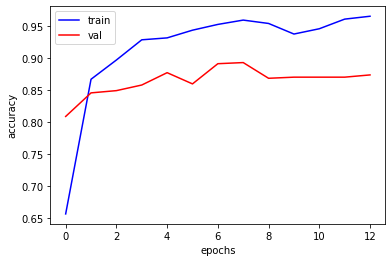

In [211]:
plt.plot(model_history.history['accuracy'], 'b',label='train')
plt.plot(model.history.history['val_accuracy'], 'r', label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [212]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 5.7639 - accuracy: 0.8812


[5.7638983726501465, 0.8811880946159363]

(784,)
2


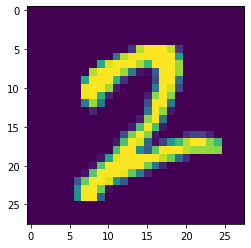

In [230]:
sample = X_test[56]
plt.imshow(tf.reshape(sample, shape=[28,28]))
# plt.imshow(X_test[0])
print(sample.shape)
pred_prob = model.predict(tf.reshape(sample, shape=[-1, 784]))
print(np.argmax(pred_prob))

In [195]:
model_history.history

{'loss': [26.701303482055664,
  3.2543680667877197,
  1.6212701797485352,
  1.2632408142089844,
  1.2885998487472534,
  1.3058750629425049,
  0.8060641288757324,
  1.0358418226242065],
 'accuracy': [0.6496240496635437,
  0.893233060836792,
  0.923308253288269,
  0.9383458495140076,
  0.9436089992523193,
  0.942105233669281,
  0.9533834457397461,
  0.9563909769058228],
 'val_loss': [6.323612213134766,
  5.007503986358643,
  3.6665797233581543,
  5.34500789642334,
  4.8955769538879395,
  3.852623462677002,
  5.16375732421875,
  3.8228018283843994],
 'val_accuracy': [0.819298267364502,
  0.8456140160560608,
  0.8631578683853149,
  0.8491228222846985,
  0.8649122714996338,
  0.8947368264198303,
  0.8701754212379456,
  0.8912280797958374]}

In [55]:
model.history.history

{'loss': [20.814838409423828,
  3.203307628631592,
  1.5186173915863037,
  0.8939762115478516,
  0.43161872029304504,
  0.2243029922246933,
  0.20515497028827667],
 'accuracy': [0.48253968358039856,
  0.7873015999794006,
  0.8698412775993347,
  0.8984127044677734,
  0.934920608997345,
  0.958730161190033,
  0.9674603343009949],
 'val_loss': [8.003678321838379,
  4.948825836181641,
  5.657861709594727,
  4.611158847808838,
  4.115374565124512,
  4.640762805938721,
  4.3744611740112305],
 'val_accuracy': [0.6092592477798462,
  0.7166666388511658,
  0.699999988079071,
  0.75,
  0.7777777910232544,
  0.7481481432914734,
  0.7740740776062012]}